In [1]:
#Importing all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
##Step 1 - Download & Read Dataset from Kaggle.com
#df1 is dataframe and keep dataset from the CSV file
df1 = pd.read_csv("data\House_Data.csv")

#Pandas head() method is used to return top n (5 by default) rows of a data frame.
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
##Step 2 - Read and validate the Data  
#Get the total number of rows or elements in dataframe
df1.size

30456

In [4]:
#Get the tuple of shape (Rows, columns) of dataframe/series
df1.shape

(3384, 9)

In [5]:
#Returns dimension of dataframe/series. 1 for one dimension (series), 2 for two dimension (dataframe)
df1.ndim

2

In [6]:
#get the number of rows for each area_type, example Built-up Area has 2418 rows which will help us categories our search for area_type
area_types = df1.groupby('area_type')['area_type'].agg('count')
area_types

area_type
Built-up  Area           626
Carpet  Area              28
Plot  Area               504
Super built-up  Area    2226
Name: area_type, dtype: int64

In [7]:
#get the number of records based on availablity so we can identify how many are ready to move type houses
availability = df1.groupby('availability')['availability'].agg('count')
availability

availability
14-Nov                     1
16-Dec                     1
16-Mar                     2
17-Apr                     1
17-Aug                     2
                        ... 
22-Jun                     4
22-Mar                     1
22-May                     4
Immediate Possession       5
Ready To Move           2725
Name: availability, Length: 64, dtype: int64

In [8]:
#drop unwanted columns such as society, balcony and store in another dataframe
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
##Step 3 - Data Cleaning process
#Data cleaning process starts with handling NA or Null values
df2.isnull().sum()

location       1
size           5
total_sqft     0
bath          23
price          0
dtype: int64

In [10]:
#drop NA or Null values
#create another dataframe by dropping values and storing into new dataframe
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
#Now New Data Framework do not have any null values
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
3379,Whitefield,2 BHK,1215,2.0,39.00
3380,Kanakadasa Layout,4 Bedroom,1200,3.0,95.00
3381,Lakshminarayana Pura,2 BHK,1336,2.0,100.00
3382,Yeshwanthpur,1 BHK,673,1.0,36.85


In [12]:
#Now I see there are duplicate values with different strings in size column, 
#such as 4 Bedroom and 4 BHK is the same, so I will normalize them.
#First find out Unique values in Size column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '2 Bedroom', '5 BHK', '6 BHK',
       '5 Bedroom'], dtype=object)

In [13]:
#Create new column named 'bhk' based on 'Size' column
# we can get the bhk value by splitting size column with space and get 1st value and convert into integer
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3['bhk'].unique()

array([2, 4, 3, 6, 1, 5], dtype=int64)

In [15]:
#now some of the bhk has value of 16, 43,12 etc. Those houses must be huge. 
#finding such huge houses in Mumbai is highly impossible. So check what are those data who has more than 11 bedrooms
df3[df3.bhk>11]
#there must be something wrong because total_sqft is 2400 for 43 bhk, which is highly impossible. We need to cleanup those values. 

,location,size,total_sqft,bath,price,bhk


In [16]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '3016', '1336', '673'], dtype=object)

In [17]:
#some of the total_sqft values are not in proper format hence taking the average value and convert them into float. 
#find out which values are float and which are not

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [19]:
#Write python function to take total_sqft value as a range because of two values and return average value
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
#try the function
convert_sqft_to_num('2166')
convert_sqft_to_num('2100 2850 Meters')

In [21]:
#create new Data frame
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [22]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [23]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [24]:
df5 = df4.copy()

In [25]:
#In Real Estate market Sqft is very important, so find out per sqft.
df5['price_per_sqft']= df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
#Check how many locations we have
#Too many dimensions can be complex
len(df5.location.unique())

742

In [27]:
#How many data points (properties) are available for location
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield             125
Sarjapur  Road          79
Kanakpura Road          72
Electronic City         72
Thanisandra             53
                      ... 
Kumbena Agrahara         1
Kumbhena Agrahara        1
Kundalahalli Colony      1
Lakshmiamma Garden       1
1 Giri Nagar             1
Name: location, Length: 737, dtype: int64

In [28]:
#Find out which locations has less than 10 properties
len(location_stats[location_stats <= 10])

666

In [29]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Bhoganhalli            10
Horamavu Agara         10
Sahakara Nagar         10
Anekal                 10
Magadi Road            10
                       ..
Kumbena Agrahara        1
Kumbhena Agrahara       1
Kundalahalli Colony     1
Lakshmiamma Garden      1
1 Giri Nagar            1
Name: location, Length: 666, dtype: int64

In [30]:
#Put them in others category
#first count them 
len(df5.location.unique())

737

In [31]:
#If location count is less than 10 then put them in other
df5.location = df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

72

In [32]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,other,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,other,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [33]:
#Remove or cleanup data outliers which are not required and need to remove to cleanup
#approx 600 sqft 1BHK typical threshold
#For example 1020 sqft can not be 6 bedroom flat, it is unusal. These are data error.
#Find out 1BHK is less than 300 then show me the value. 
df5[df5.total_sqft/df5.bhk <300].head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,4 Bedroom,600.0,9.0,200.0,4,33333.333333
58,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,other,2 BHK,460.0,1.0,22.0,2,4782.608696


In [34]:
df5.shape

(3360, 7)

In [35]:
#remove those data points which are less than 300 sqft/BHK
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(3197, 7)

In [36]:
df6.price_per_sqft.describe()

count     3183.000000
mean      6213.810910
std       3481.622370
min        267.829813
25%       4236.819129
50%       5300.000000
75%       6888.305313
max      37500.000000
Name: price_per_sqft, dtype: float64

In [43]:
#Now we have final clean dataset to work
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,other,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
3379,Whitefield,2 BHK,1215.0,2.0,39.00,2,3209.876543
3380,other,4 Bedroom,1200.0,3.0,95.00,4,7916.666667
3381,other,2 BHK,1336.0,2.0,100.00,2,7485.029940
3382,Yeshwanthpur,1 BHK,673.0,1.0,36.85,1,5475.482912


In [38]:
df6.groupby(['size']).sum()

,total_sqft,bath,price,bhk,price_per_sqft
size,,,,,
1 BHK,80656.910,135.0,4229.690,126,6.155209e+05
1 Bedroom,16713.820,22.0,1186.950,22,1.485174e+05
1 RK,2256.000,5.0,122.500,5,2.711614e+04
2 BHK,1498467.465,2624.0,76653.000,2640,6.631433e+06
2 Bedroom,103751.000,153.0,7479.470,162,5.748143e+05
3 BHK,1806736.020,2981.0,115401.915,3276,6.569434e+06
3 Bedroom,251106.000,334.0,17330.740,339,9.292379e+05
4 BHK,437425.510,622.0,37891.130,576,1.204045e+06
4 Bedroom,654952.000,1105.0,64599.300,884,2.357644e+06


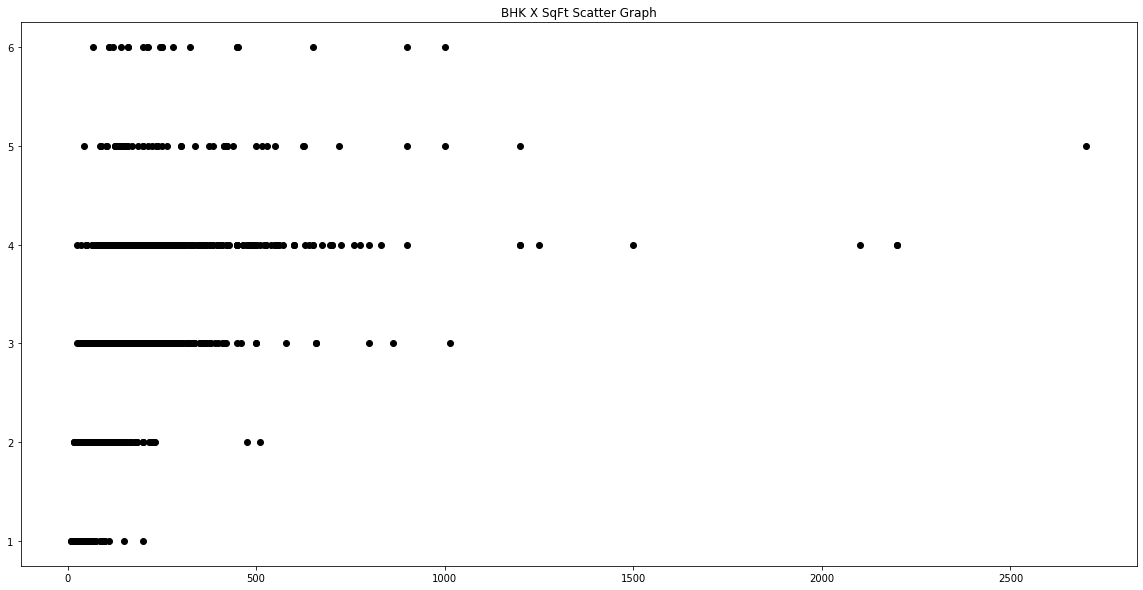

In [39]:
import matplotlib.pyplot as plt

psqf = df6.price
bhk = df6.bhk

plt.scatter(psqf,bhk,label='Lot', color='k')

plt.title('BHK X SqFt Scatter Graph')
plt.legend
plt.show()

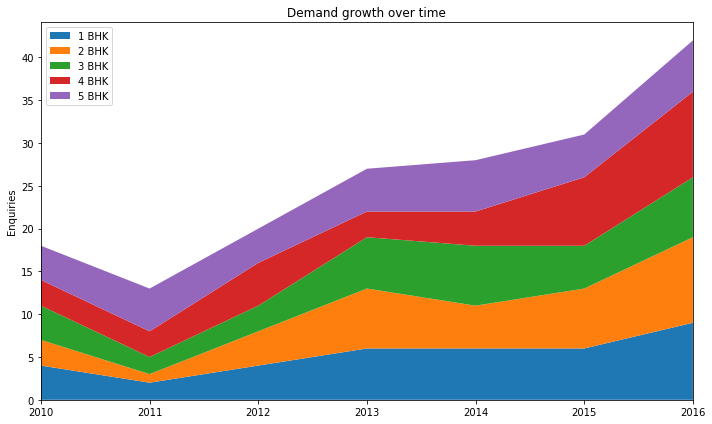

In [102]:
#find out the demand for number of BHK increasing
rng = np.arange(7) #bhk
rnd = np.random.randint(0, 5, size=(5, rng.size))
BHK = 2010 + rng

fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(BHK, rng + rnd, labels=['1 BHK', '2 BHK', '3 BHK','4 BHK', '5 BHK'])
ax.set_title('Demand growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Enquiries')
ax.set_xlim(xmin=BHK[0], xmax=BHK[-1])
fig.tight_layout()